<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [2]:
bike = pd.read_csv("store_sharing.csv")
bike.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


In [3]:
bike.sort_values("cnt", ascending=False)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
4470,2015-07-09 17:00:00,7860,23.0,22.0,27.0,11.0,1.0,0.0,0.0,1.0
4461,2015-07-09 08:00:00,7531,14.5,14.5,61.0,19.0,2.0,0.0,0.0,1.0
5138,2015-08-06 17:00:00,7208,22.5,22.5,55.0,17.5,2.0,0.0,0.0,1.0
4471,2015-07-09 18:00:00,6913,22.5,21.5,29.0,13.0,1.0,0.0,0.0,1.0
5129,2015-08-06 08:00:00,6585,19.0,19.0,78.0,12.0,7.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
12798,2016-06-23 03:00:00,12,19.0,19.0,94.0,8.0,7.0,0.0,0.0,1.0
11070,2016-04-12 03:00:00,11,9.0,7.0,87.0,14.0,7.0,0.0,0.0,0.0
17393,2017-01-03 03:00:00,10,0.0,-4.0,93.0,13.0,1.0,0.0,0.0,3.0
16361,2016-11-21 03:00:00,9,6.0,3.5,93.0,12.0,7.0,0.0,0.0,2.0


In [4]:
bike["season"].replace([0.0,1.0,2.0,3.0],["spring","summer","fall","winter"], inplace=True)
bike.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,winter


In [5]:
bike["weather_code"].replace([1,2,3,4,7,10,26,94],["Clear","Scattered clouds", "Broken clouds","Cloudy","Light rain","rain with thunderstorm","snowfall","Freezing Fog"], inplace=True)
bike.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,0.0,1.0,winter


In [6]:
bike["is_holiday"].replace([0.0,1.0],["workday","holiday"], inplace=True)
bike.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,workday,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,workday,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,workday,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,workday,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,workday,1.0,winter


In [7]:
bike["is_weekend"].replace([0.0,1.0],["weekday","weekend"], inplace=True)
bike.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,workday,weekend,winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,workday,weekend,winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,workday,weekend,winter
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,workday,weekend,winter
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,workday,weekend,winter


In [8]:
object_cols = bike.select_dtypes(include = 'object')

for col in object_cols:
    print(col)
    print("--"*5)
    print(bike[col].value_counts(dropna = False))
    print("--"*10)

timestamp
----------
2015-01-04 00:00:00    1
2016-05-04 12:00:00    1
2016-05-04 18:00:00    1
2016-05-04 17:00:00    1
2016-05-04 16:00:00    1
                      ..
2015-09-03 17:00:00    1
2015-09-03 18:00:00    1
2015-09-03 19:00:00    1
2015-09-03 20:00:00    1
2017-01-03 23:00:00    1
Name: timestamp, Length: 17414, dtype: int64
--------------------
weather_code
----------
Clear                     6150
Scattered clouds          4034
Broken clouds             3551
Light rain                2141
Cloudy                    1464
snowfall                    60
rain with thunderstorm      14
Name: weather_code, dtype: int64
--------------------
is_holiday
----------
workday    17030
holiday      384
Name: is_holiday, dtype: int64
--------------------
is_weekend
----------
weekday    12444
weekend     4970
Name: is_weekend, dtype: int64
--------------------
season
----------
spring    4394
summer    4387
winter    4330
fall      4303
Name: season, dtype: int64
--------------------


In [9]:
bike.groupby('season')['weather_code'].value_counts(dropna = False)

season  weather_code          
fall    Clear                     1356
        Scattered clouds          1034
        Broken clouds             1011
        Light rain                 519
        Cloudy                     372
        snowfall                    10
        rain with thunderstorm       1
spring  Clear                     1752
        Scattered clouds           955
        Broken clouds              804
        Light rain                 544
        Cloudy                     326
        rain with thunderstorm       7
        snowfall                     6
summer  Clear                     1822
        Scattered clouds          1119
        Broken clouds              775
        Light rain                 450
        Cloudy                     216
        rain with thunderstorm       5
winter  Clear                     1220
        Broken clouds              961
        Scattered clouds           926
        Light rain                 628
        Cloudy                   

In [10]:
bike.corr()

,cnt,t1,t2,hum,wind_speed
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295
t1,0.388798,1.000000,0.988344,-0.447781,0.145471
t2,0.369035,0.988344,1.000000,-0.403495,0.088409
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000


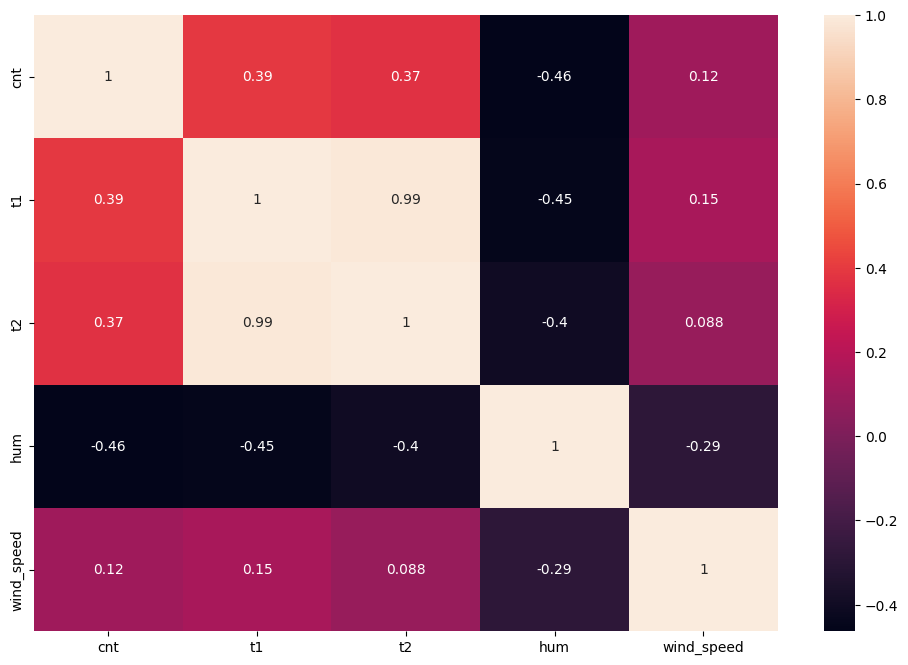

In [11]:
plt.figure(figsize = (12,8) , dpi = 100)

sns.heatmap(bike.corr() , annot = True);

<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [12]:
bike.info()   #Burdaki değerler incelendiğinde data setimizin clear olduğu anlaşılıyor

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  object 
 7   is_holiday    17414 non-null  object 
 8   is_weekend    17414 non-null  object 
 9   season        17414 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [13]:
bike.duplicated().value_counts()

False    17414
dtype: int64

In [14]:
bike.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, holiday, weekend and weathercode)
</span>


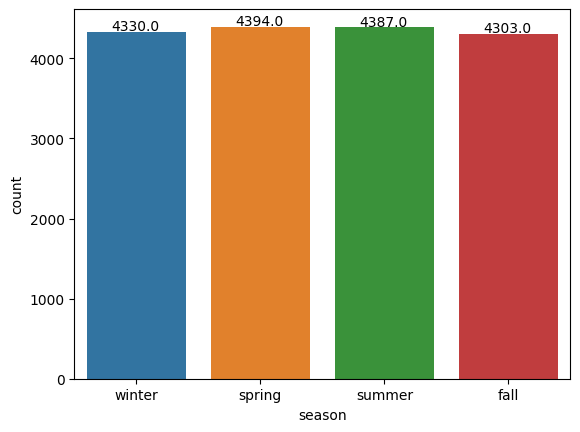

In [16]:
# season
ax = sns.countplot(x = "season", data=bike)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20))

plt.show()

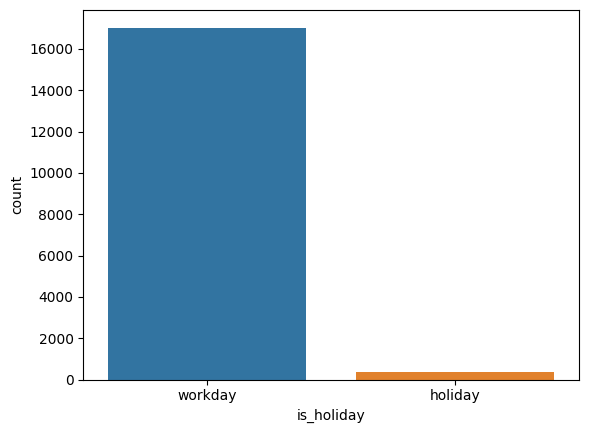

In [17]:
# is_holiday
sns.countplot(x = "is_holiday", data=bike)
plt.show()

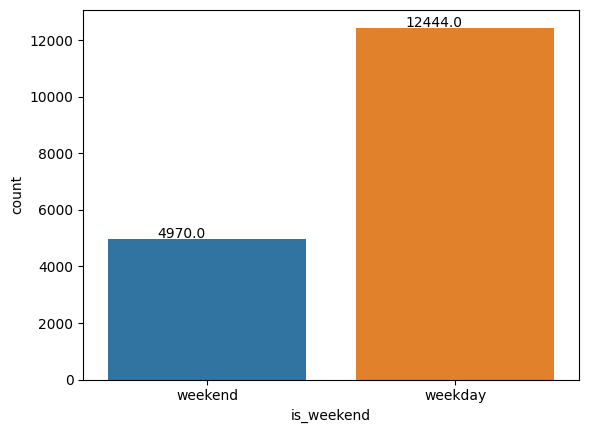

In [18]:
# is_weekend
ax = sns.countplot(x = "is_weekend", data=bike); # bu plotu bir axes'e atadık ki onun patch'ini alıp for döngüsüne kullanabilelim.

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20))

plt.show()

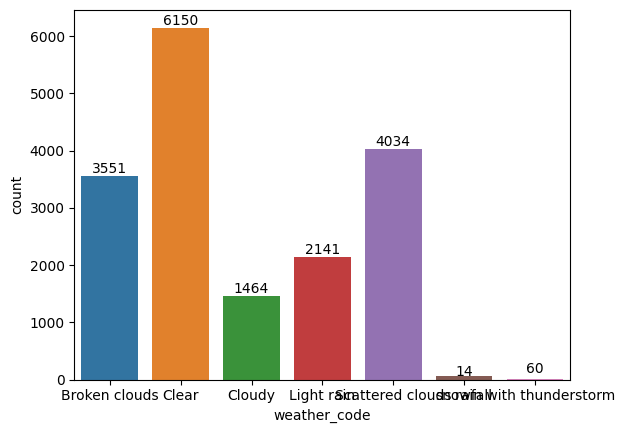

In [19]:
sns.countplot(data = bike, x = "weather_code")

code = bike.weather_code.value_counts().sort_index()
for index, value in enumerate(code):
    plt.text(index, value, str(value), ha="center", va="bottom")

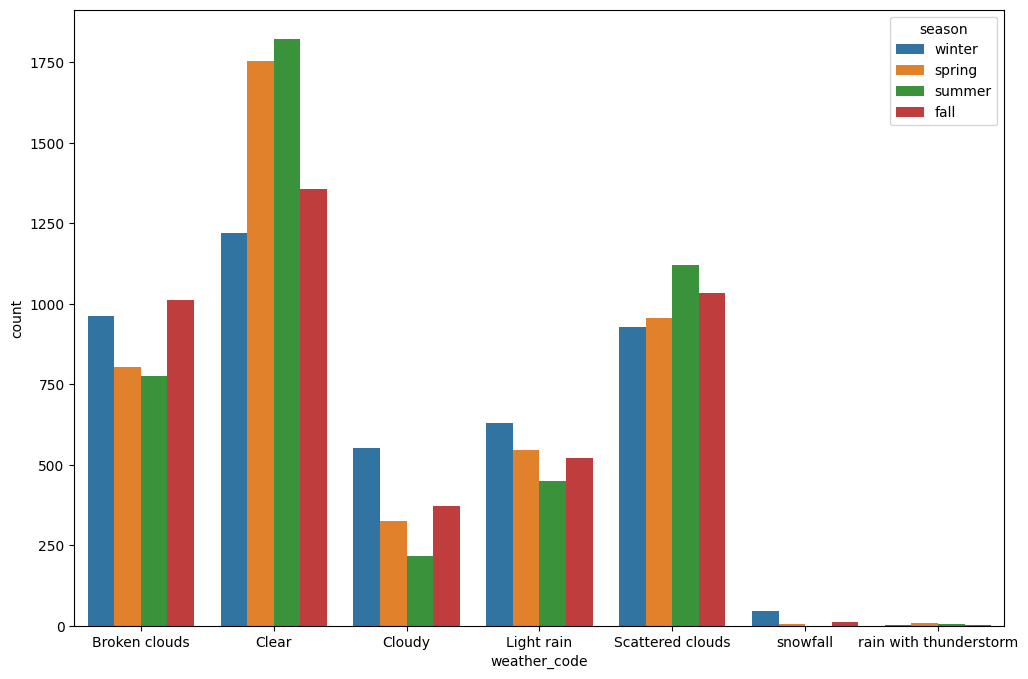

In [20]:
plt.subplots(figsize = (12,8))
sns.countplot(data = bike, x = "weather_code", hue = "season");

# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [21]:
bike.timestamp = pd.to_datetime(bike.timestamp)

In [22]:
bike.set_index("timestamp", inplace=True)
bike.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,workday,weekend,winter
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,workday,weekend,winter
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,workday,weekend,winter
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,workday,weekend,winter
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,workday,weekend,winter


<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

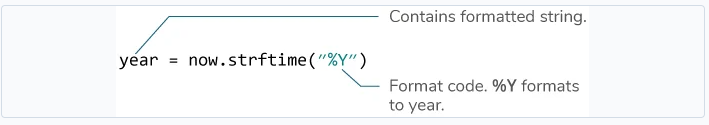

In [23]:
bike["year-month"] = bike.index.strftime("%Y-%m")
bike["year"] =  bike.index.year
bike["month"] =  bike.index.month
bike["day_of_month"] =  bike.index.day
bike["day_of_week"] =  bike.index.dayofweek
bike["day_of_name"] = bike.index.day_name()
bike["hour"] = bike.index.hour

In [24]:
bike.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year-month,year,month,day_of_month,day_of_week,day_of_name,hour
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,workday,weekend,winter,2015-01,2015,1,4,6,Sunday,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,workday,weekend,winter,2015-01,2015,1,4,6,Sunday,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,workday,weekend,winter,2015-01,2015,1,4,6,Sunday,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,workday,weekend,winter,2015-01,2015,1,4,6,Sunday,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,workday,weekend,winter,2015-01,2015,1,4,6,Sunday,4


<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

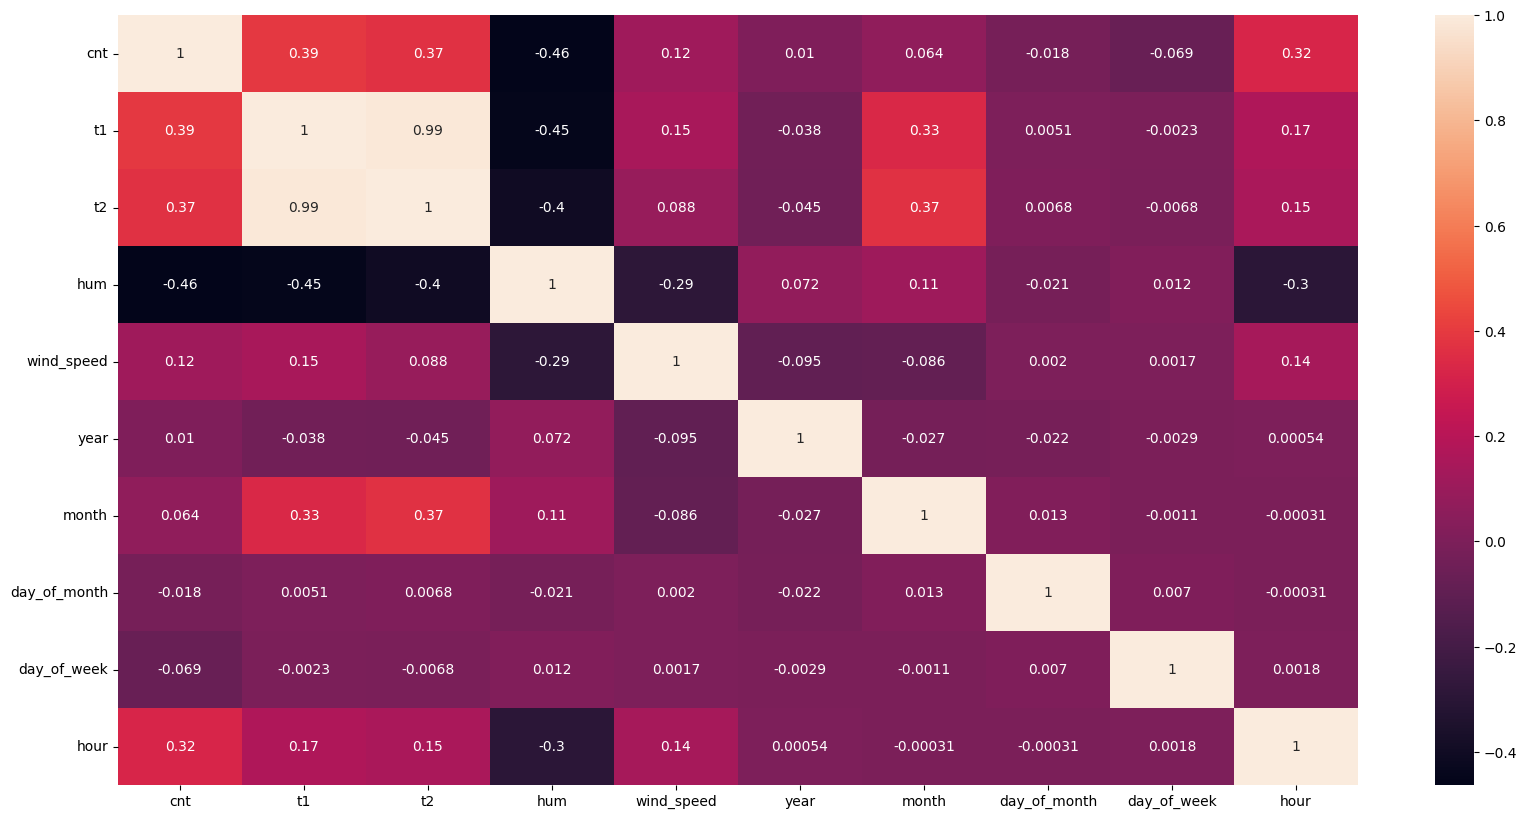

In [25]:
# for all variables 
plt.figure(figsize=(20,10))
sns.heatmap(bike.corr(),  annot=True);

In [26]:
df_corr_cnt = bike.corr()[["cnt"]].sort_values(by="cnt", ascending=False) 
df_corr_cnt

,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
hour,0.324423
wind_speed,0.116295
month,0.063757
year,0.010046
day_of_month,-0.017887
day_of_week,-0.068688
hum,-0.462901


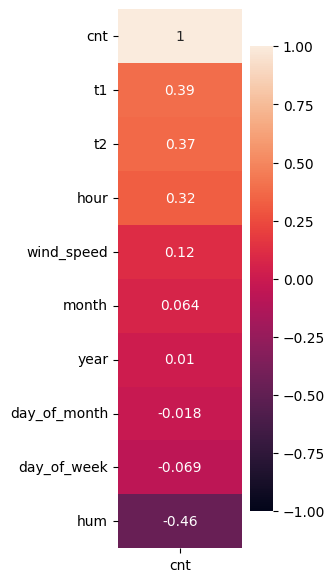

In [27]:
# for the target variable
plt.figure(figsize=(2,7))
sns.heatmap(df_corr_cnt, annot=True, vmin=-1, vmax=1);

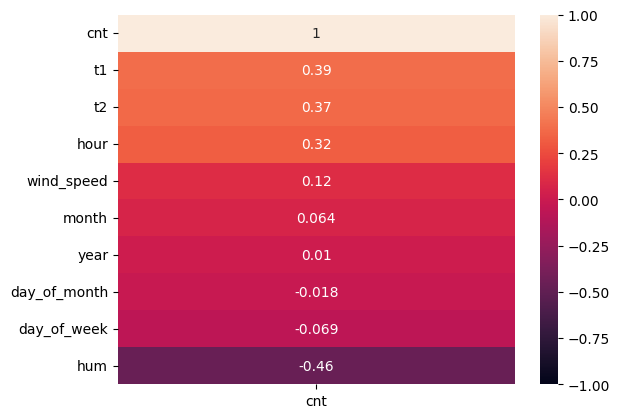

In [28]:
sns.heatmap(bike.corr()[["cnt"]].sort_values(by="cnt", ascending=False), annot=True, vmin=-1, vmax=1);

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

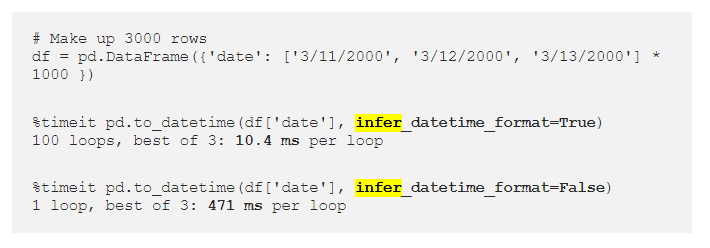

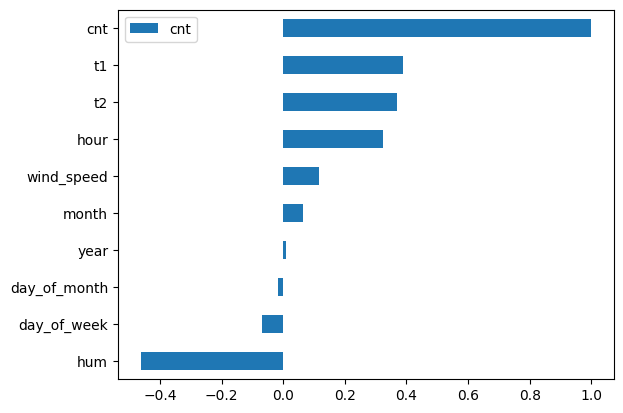

In [29]:
bike.corr()[["cnt"]].sort_values(by="cnt", ascending=True).plot.barh();

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

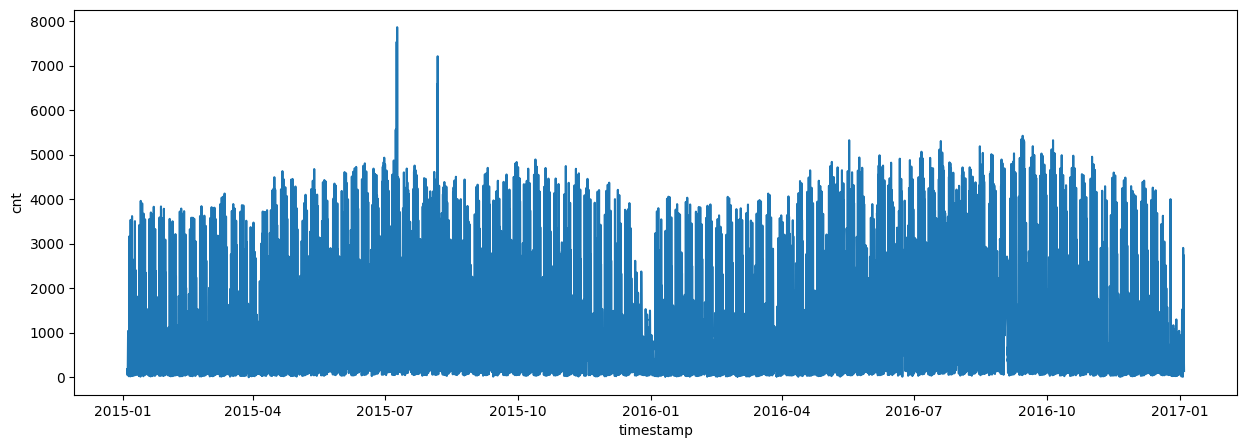

In [30]:
plt.figure(figsize=(15,5))
sns.lineplot(x=bike.index, y="cnt", data=bike)
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

In [31]:
df_sum = pd.DataFrame(bike.groupby("year-month").cnt.sum())
df_sum

,cnt
year-month,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


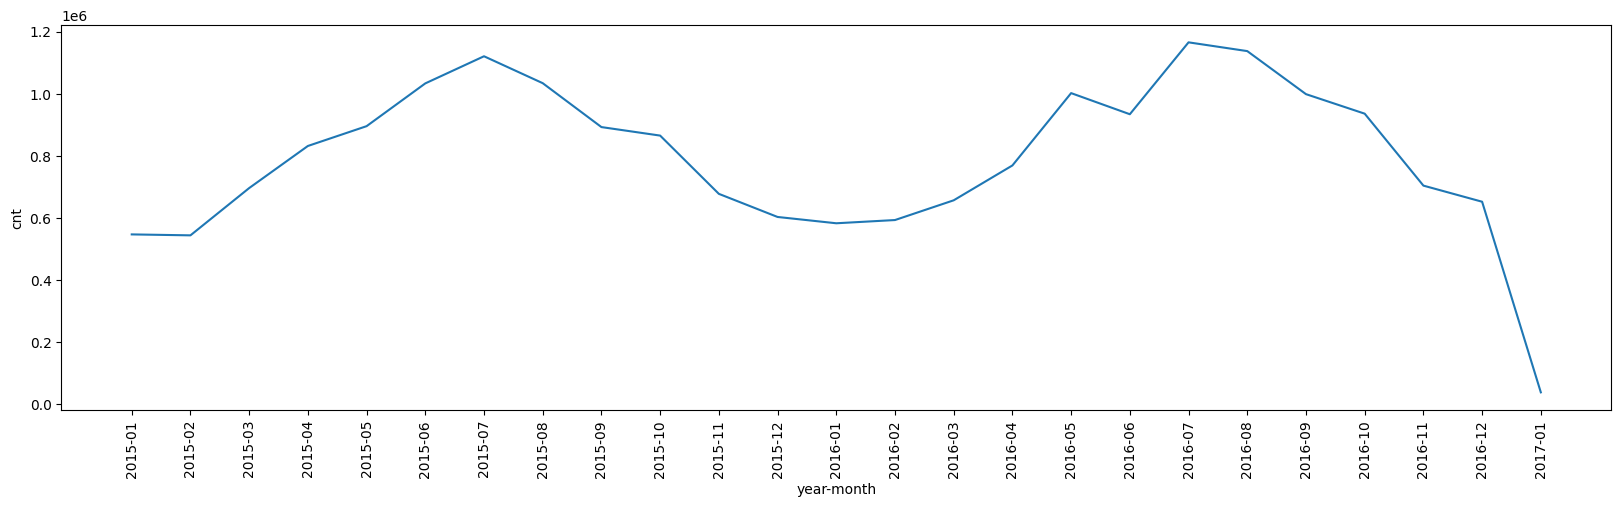

In [32]:
# with lineplot
plt.figure(figsize=(20,5))
sns.lineplot(x="year-month",y="cnt", data = df_sum)
plt.xticks(rotation=90)
plt.show()

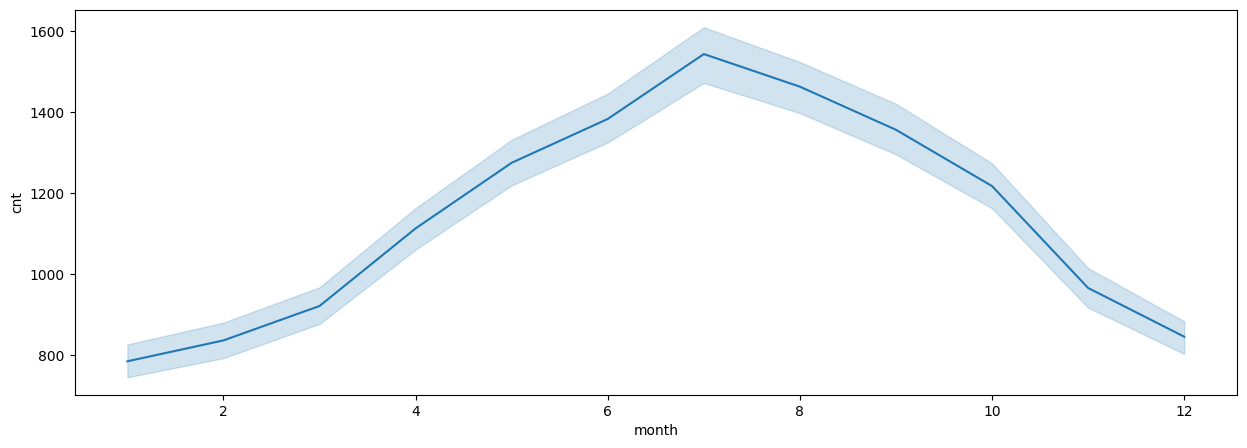

In [33]:
# with lineplot
plt.figure(figsize=(15,5))
sns.lineplot(x= "month", y="cnt", data=bike);

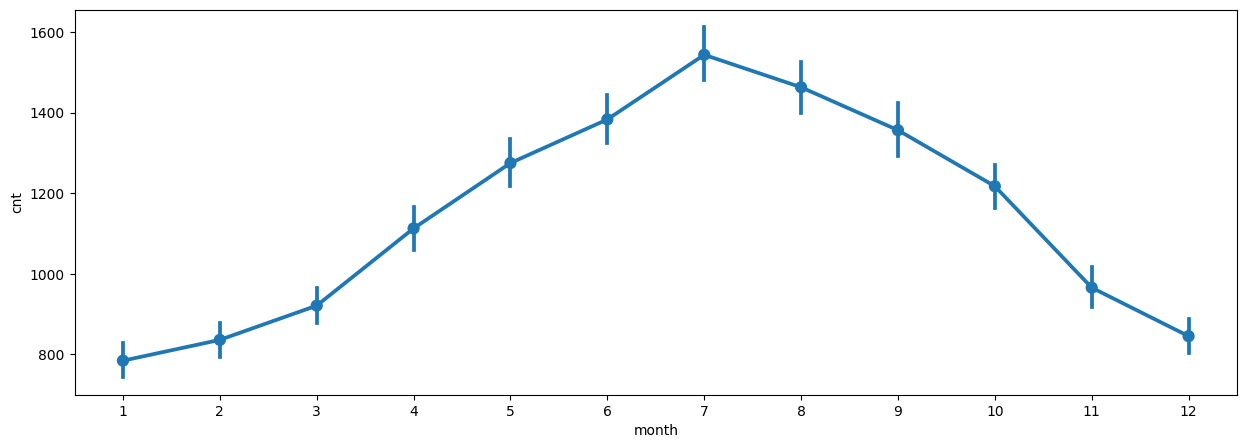

In [34]:
# with pointplot
plt.figure(figsize=(15,5))
sns.pointplot(x= "month", y="cnt", data=bike);

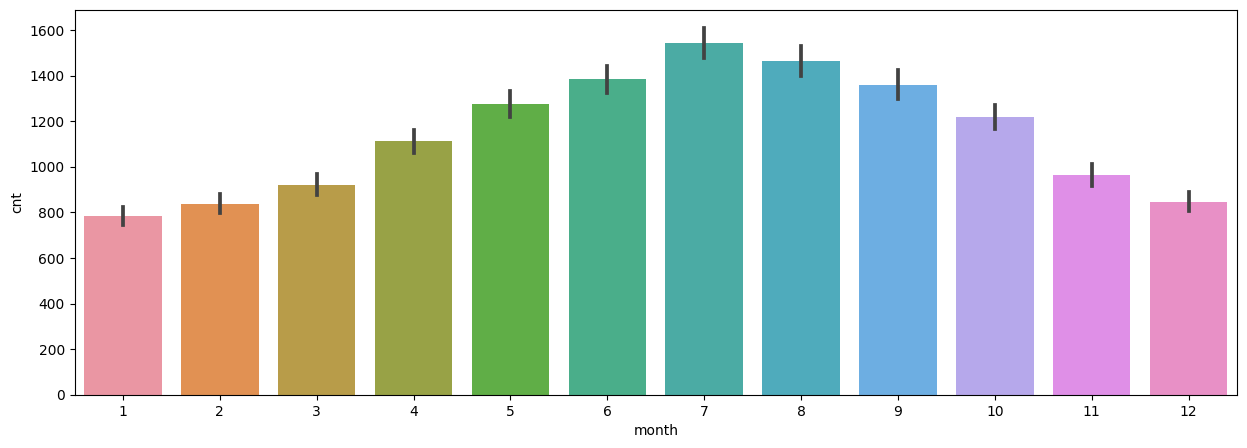

In [35]:
# with barplot
plt.figure(figsize=(15,5))
sns.barplot(x= "month", y="cnt", data=bike);

<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

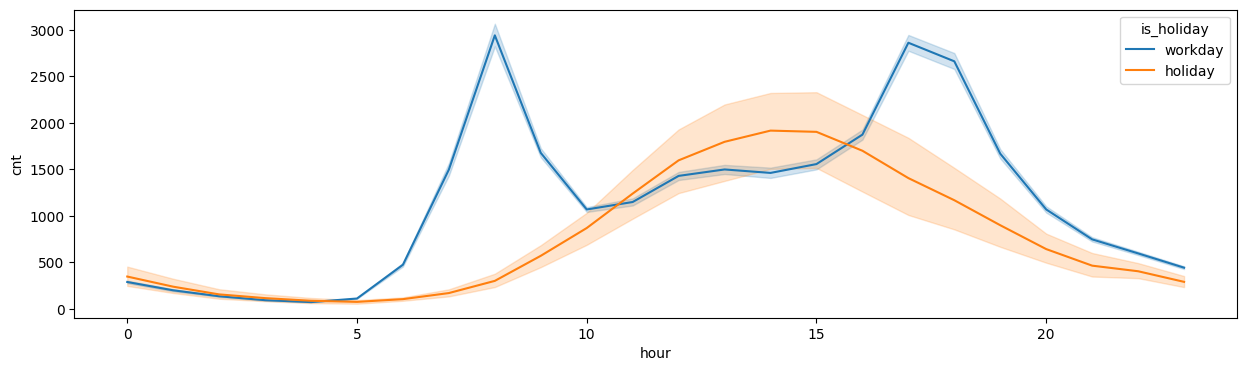

In [36]:
# with lineplot (*whether it is a holiday or not*)

plt.figure(figsize=(15,4))
sns.lineplot(x= "hour", y="cnt", data=bike, hue="is_holiday");

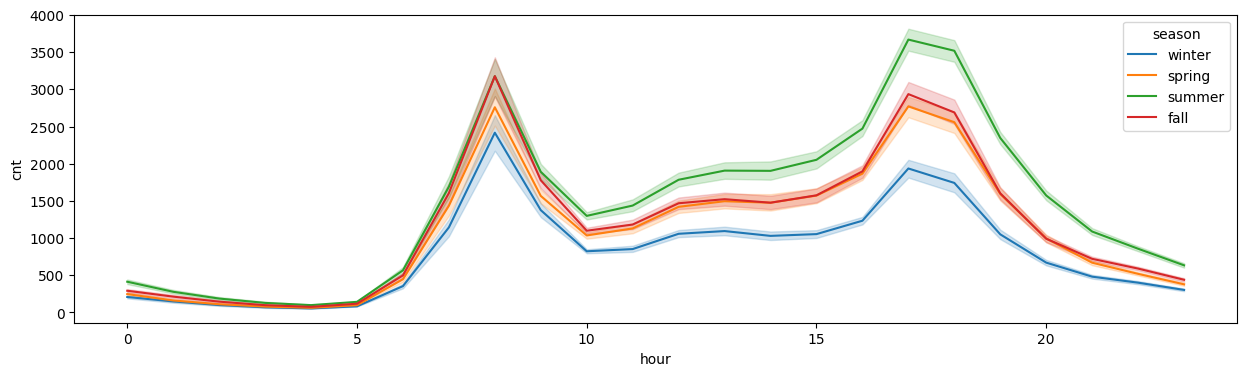

In [37]:
# with lineplot (*You may want to see seasonal breakdowns*)

plt.figure(figsize=(15,4))
sns.lineplot(x= "hour", y="cnt", data=bike, hue="season");

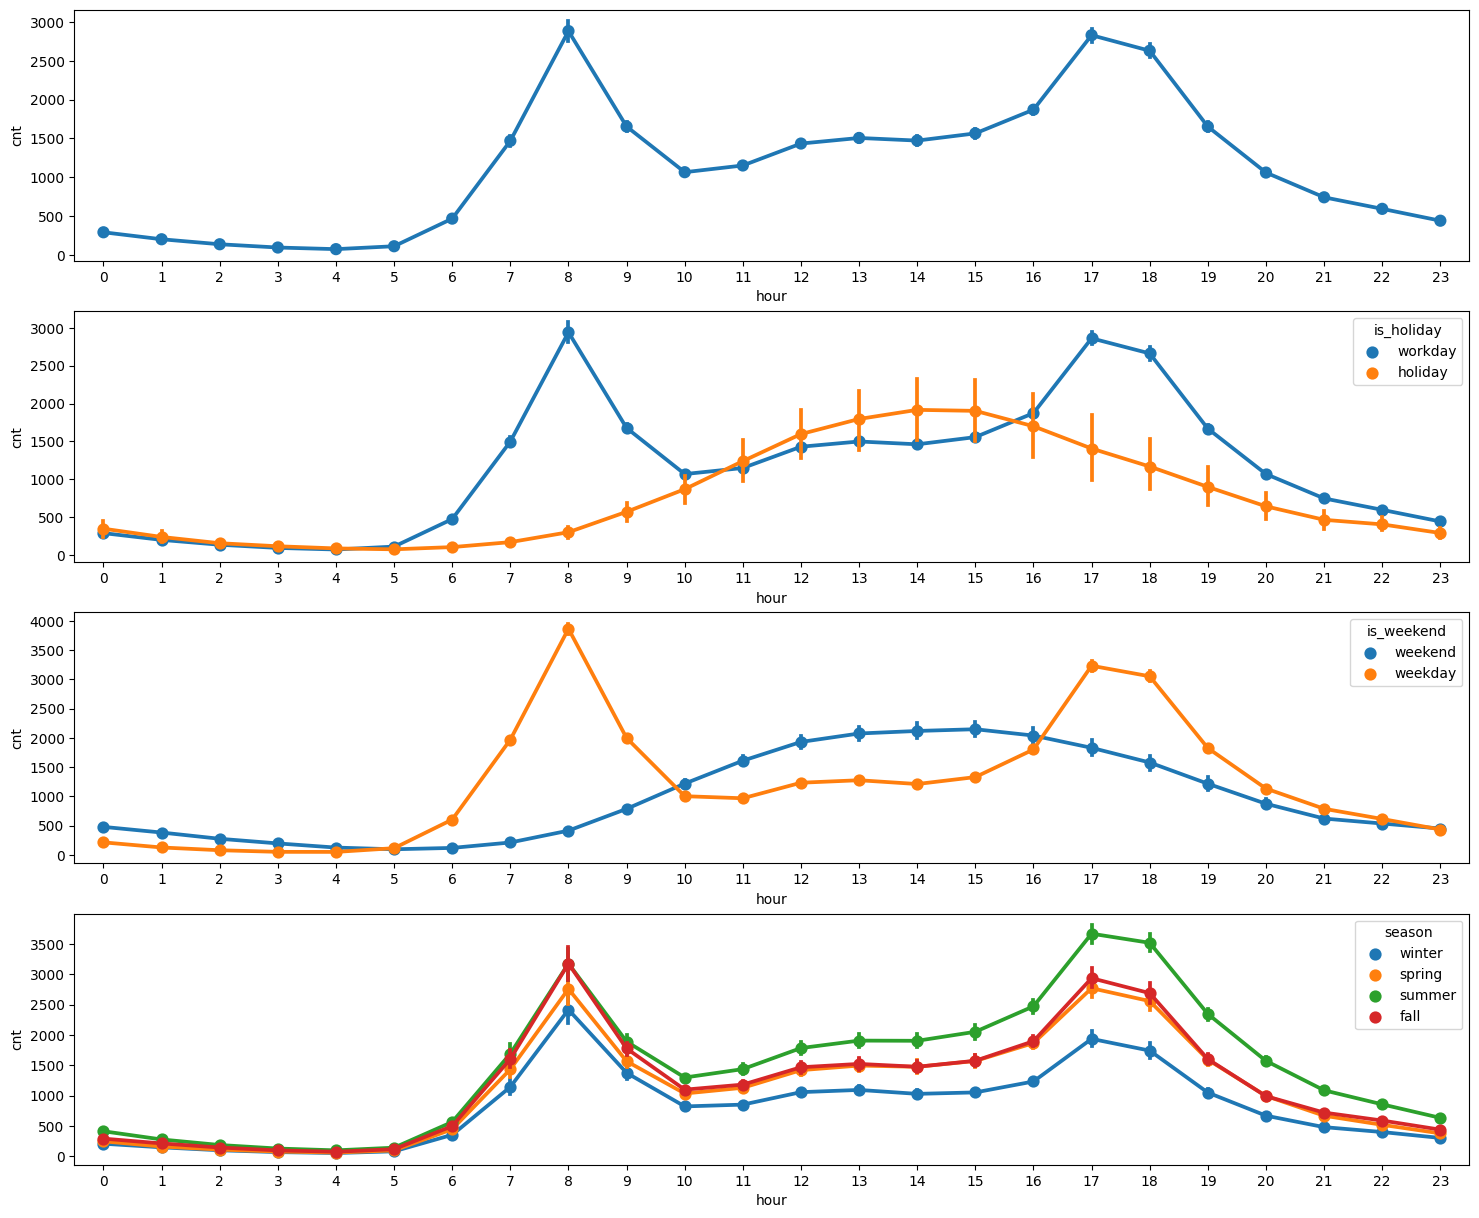

In [38]:
# with pointplot

fig, ax = plt.subplots(ncols=1, nrows=4, figsize = (18,15))

sns.pointplot(data=bike, x="hour", y="cnt", ax = ax[0])
sns.pointplot(data=bike, x="hour", y="cnt", ax = ax[1], hue="is_holiday")
sns.pointplot(data=bike, x="hour", y="cnt", ax = ax[2], hue="is_weekend")
sns.pointplot(data=bike, x="hour", y="cnt", ax = ax[3], hue="season");

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

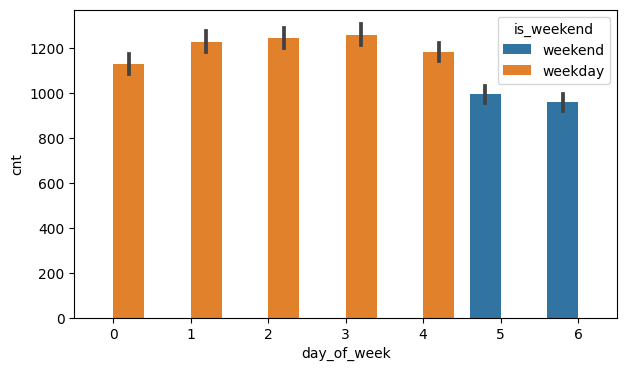

In [39]:
# with barplot

plt.figure(figsize=(7,4))
sns.barplot(x="day_of_week", y="cnt", data=bike, hue="is_weekend");

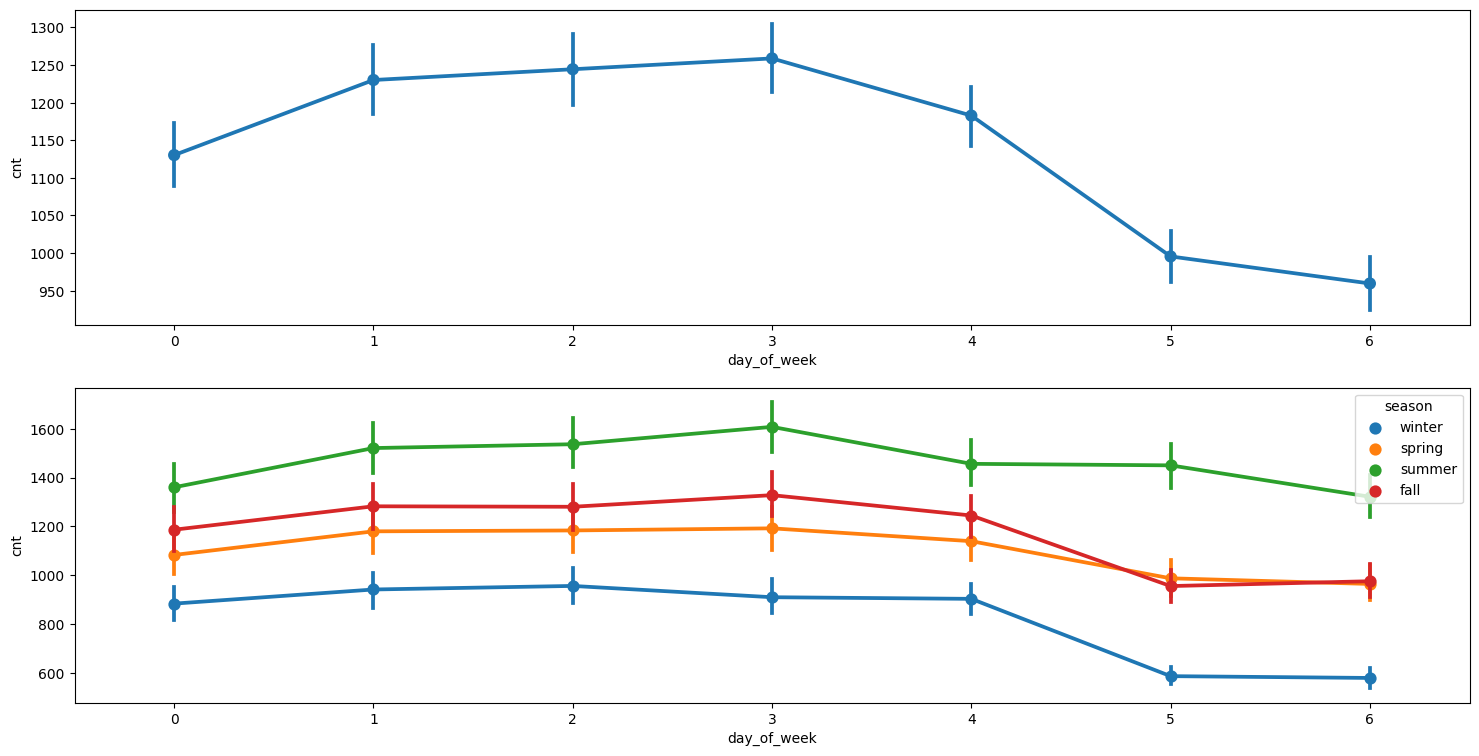

In [40]:
# with pointplot

fig , ax = plt.subplots(2,1, figsize=(18,9))

sns.pointplot(data=bike, x="day_of_week", y="cnt", ax=ax[0])
sns.pointplot(data=bike, x="day_of_week", y="cnt", ax=ax[1], hue="season");

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

In [41]:
pd.DataFrame(bike.groupby("day_of_month").cnt.mean().astype("int")).T

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


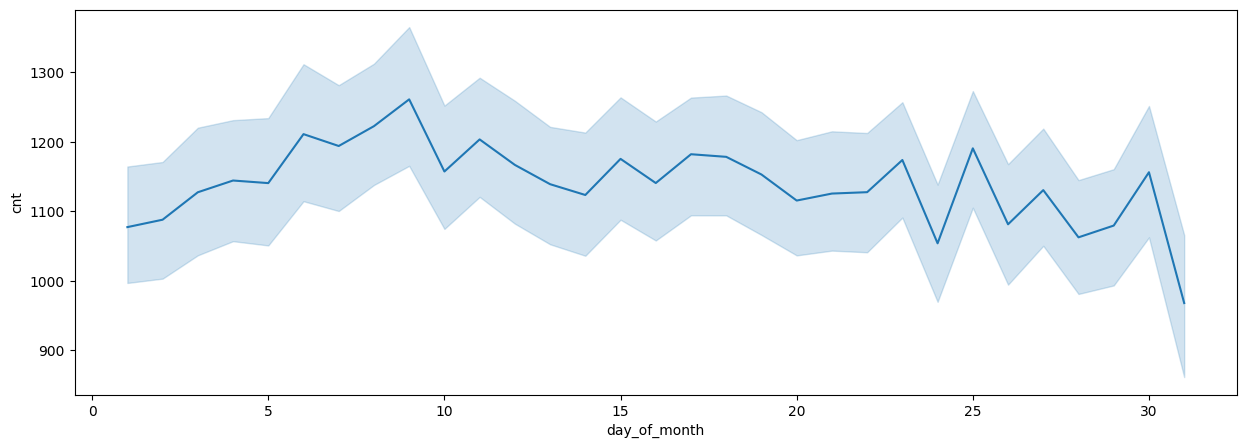

In [42]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=bike, x="day_of_month", y="cnt");

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

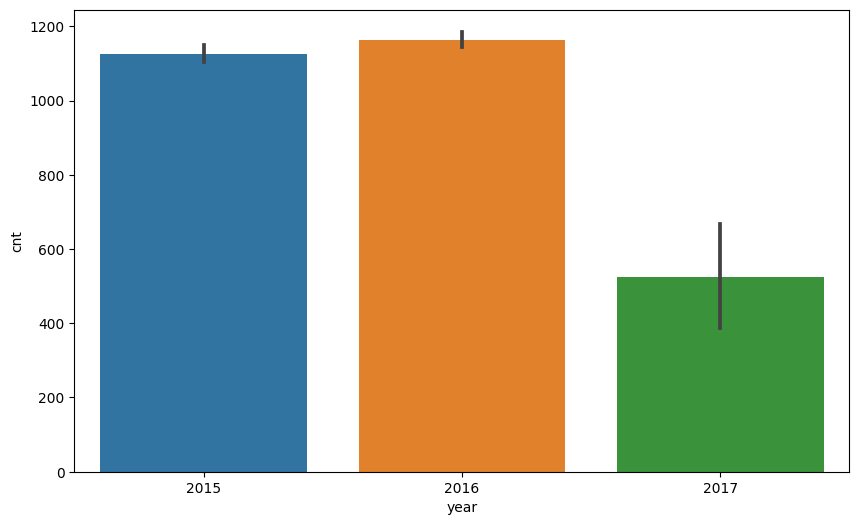

In [43]:
# with barplot
plt.figure(figsize=(10,6))
sns.barplot(data=bike, x="year",y="cnt");

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

In [44]:
bike.is_weekend.value_counts()

weekday    12444
weekend     4970
Name: is_weekend, dtype: int64

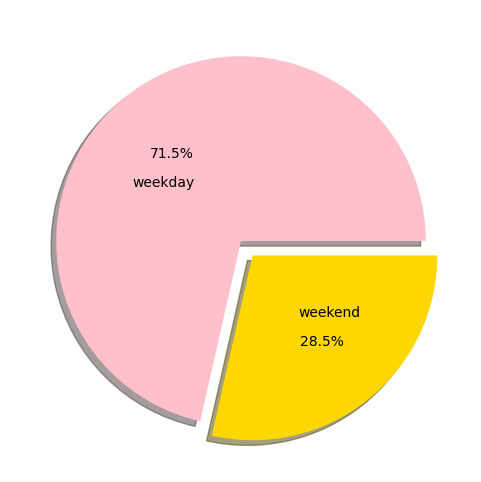

In [45]:
# pie chart
fig, ax = plt.subplots(figsize=(6,6))

colors_list = ["pink","gold"]
explode_list = [0, 0.1]

ax.pie(bike.is_weekend.value_counts().values,
      labels=["weekday","weekend"],
      labeldistance=0.4,
      autopct="%.1f%%", shadow=True, 
      colors = colors_list, explode=explode_list);

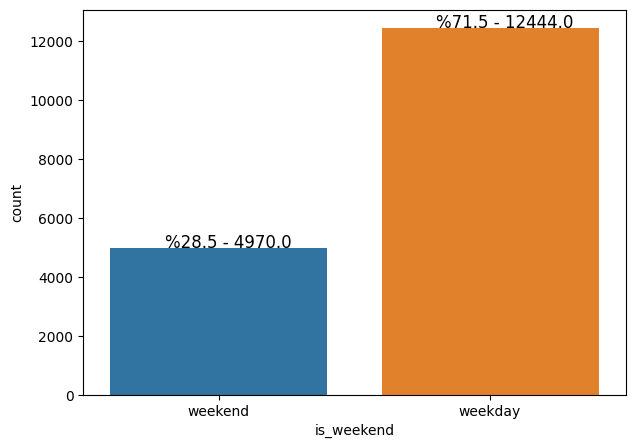

In [46]:
# with countplot
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x='is_weekend',data=bike)

for bar in ax.patches: 
        ax.annotate(  "%"+str(round(100*bar.get_height()/len(bike),1)) +' - '+ str(bar.get_height() ), 
                    (bar.get_x()+0.2 , bar.get_height()+10) ,
                    size=12)

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

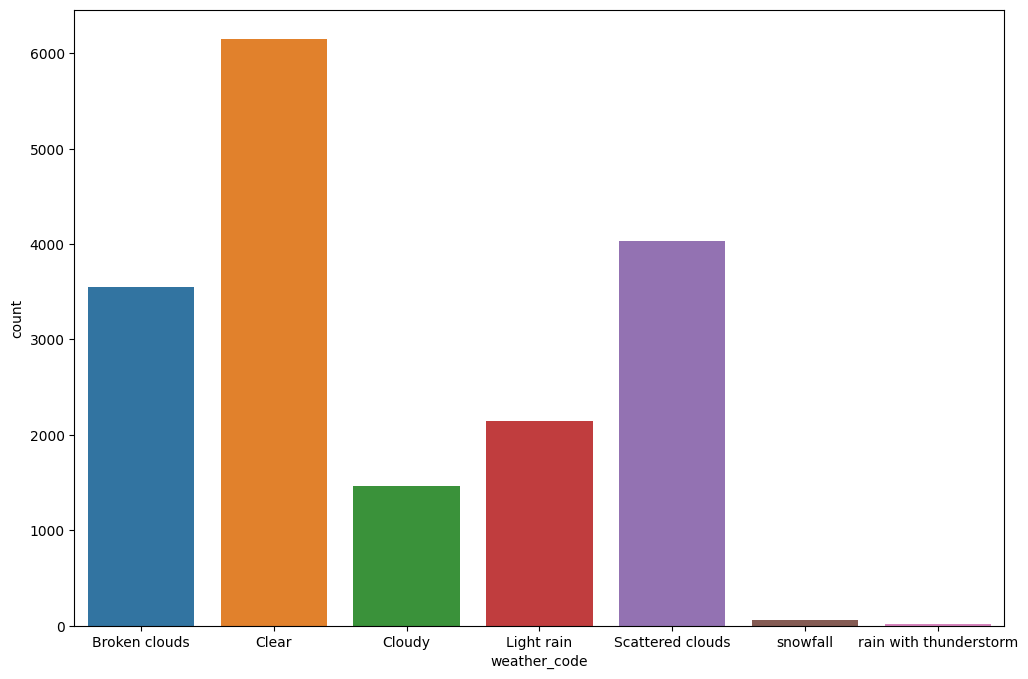

In [47]:
# with countplot
plt.subplots(figsize = (12,8))
sns.countplot(x="weather_code", data=bike);

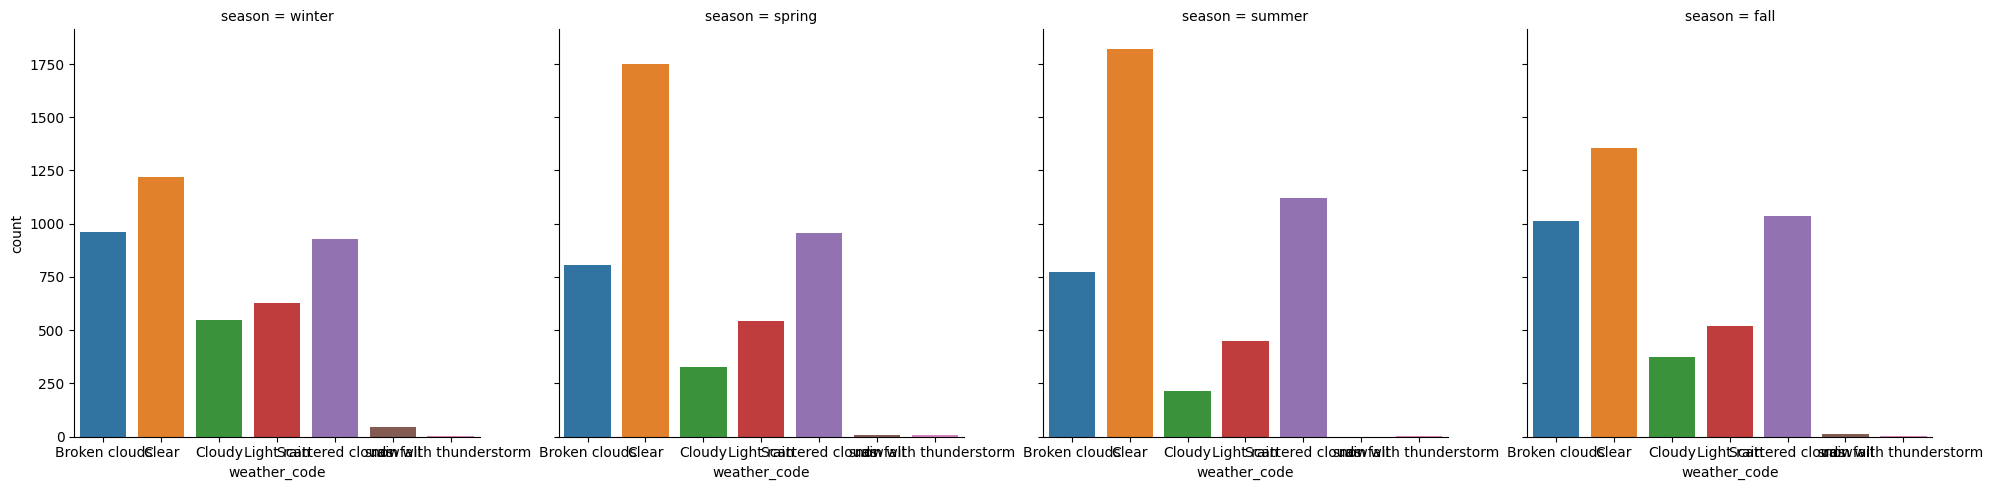

In [48]:
# with catplot
sns.catplot(x="weather_code", data=bike, col="season", kind="count");